In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
netflix_data = pd.read_csv('Data/netflix_titles.csv')

In [4]:
netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [5]:
netflix_data.shape

(8807, 12)

In [6]:
print(netflix_data.info(), "\n")
print(netflix_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description   

In [7]:
netflix_data.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [8]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [13]:
null_counts = netflix_data.isnull().sum()
total_rows = len(netflix_data)
null_percentage = (null_counts/total_rows) * 100
null_percentage

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [18]:
null_percentage_df= pd.DataFrame({'Coulmn Name' : null_percentage.index,'Null Percentage' : null_percentage.values})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)
null_percentage_df.reset_index(drop=True,inplace=True)
print(null_percentage_df)


     Coulmn Name  Null Percentage
0       director        29.908028
1        country         9.435676
2           cast         9.367549
3     date_added         0.113546
4         rating         0.045418
5       duration         0.034064
6        show_id         0.000000
7           type         0.000000
8          title         0.000000
9   release_year         0.000000
10     listed_in         0.000000
11   description         0.000000


In [19]:
columns_to_impute = ['director', 'country', 'cast', 'rating', 'duration']
for column in columns_to_impute :
    netflix_data[column].fillna("Unknown", inplace = True)

In [20]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [21]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [23]:
netflix_data.description[1]

'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'

In [24]:
netflix_data.type

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

In [25]:
tv_show = netflix_data[netflix_data['type'] == 'TV Show']
movie = netflix_data[netflix_data['type'] == 'Movie']
display(movie.head(4), '_')
display(tv_show.head(4))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


'_'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [26]:
movies_df = netflix_data[netflix_data['type'] == 'Movie']
oldest_movie = netflix_data[netflix_data['release_year'] == netflix_data['release_year'].min()]
oldest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,Unknown,Unknown,Unknown,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


In [30]:
len(netflix_data['listed_in'].unique())

514

In [42]:
netflix_data.listed_in

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [43]:
genre_counts = netflix_data['listed_in'].str.split(', ').explode().value_counts()
top_5_genres = genre_counts.head(5)
print("Top 5 most popular genres:-", top_5_genres)

Top 5 most popular genres:- listed_in
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


In [45]:
comedian_movies = netflix_data[netflix_data['listed_in'] == 'Comedies']
comedian_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,"September 1, 2021",2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...
182,s183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,"September 1, 2021",2008,PG-13,114 min,Comedies,R.J. travels to Georgia for his parents' 50th ...
342,s343,Movie,Major Payne,Nick Castle,"Damon Wayans, Karyn Parsons, William Hickey, M...",United States,"August 1, 2021",1995,PG-13,97 min,Comedies,A hardened Marine is given his marching orders...
348,s349,Movie,Poms,Zara Hayes,"Diane Keaton, Jacki Weaver, Pam Grier, Rhea Pe...","United Kingdom, United States","August 1, 2021",2019,PG-13,91 min,Comedies,"After moving to a retirement community, loner ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,s8421,Movie,The Men Who Stare at Goats,Grant Heslov,"George Clooney, Ewan McGregor, Jeff Bridges, K...","United States, United Kingdom","June 4, 2019",2009,R,94 min,Comedies,A journalist latches onto an unbelievable stor...
8433,s8434,Movie,The Naked Gun 2 1/2: The Smell of Fear,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",Unknown,"January 1, 2020",1991,PG-13,85 min,Comedies,Bumbling cop Frank Drebin is out to foil the b...
8536,s8537,Movie,The Trip to Spain,Michael Winterbottom,"Steve Coogan, Rob Brydon, Marta Barrio, Claire...",United Kingdom,"December 12, 2017",2016,TV-MA,108 min,Comedies,Comedians Steve Coogan and Rob Brydon gorge on...
8608,s8609,Movie,Total Frat Movie,Warren P. Sonoda,"Justin Deeley, Alex House, Steven Yaffee, Rebe...",United States,"December 19, 2016",2016,NR,94 min,Comedies,A disbanded fraternity tries to get their act ...


In [46]:
netflix_data.cast

0                                                 Unknown
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                 Unknown
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                              Unknown
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [47]:
cast_counts = netflix_data['cast'].str.split(', ').explode().value_counts()
top_5_cast = cast_counts.head(5)
print("Top 5 most popular genres:-", top_5_cast)

Top 5 most popular genres:- cast
Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Name: count, dtype: int64


In [48]:
recent_movie_data = netflix_data[['title','type','description']].iloc[0]
pd.set_option('display.max_colwidth',None)
print(recent_movie_data)

title                                                                                                                                              Dick Johnson Is Dead
type                                                                                                                                                              Movie
description    As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.
Name: 0, dtype: object


In [60]:
data_types_counts = netflix_data.dtypes.astype(str).value_counts()
data_types_counts

object    11
int64      1
Name: count, dtype: int64

In [61]:
fig = go.Figure(data = [go.Pie(labels = data_types_counts.index, values = data_types_counts.values)])
fig.update_layout(title_text = 'Data Types Distribution')
fig.show()

In [63]:
fig = px.histogram(netflix_data, x = 'release_year', title = 'release_year', color = 'release_year')
fig.update_layout(bargap = 0.2)
fig.show()

In [64]:
ax = px.histogram(netflix_data, x = 'country', marginal= 'box', title = 'country')
ax.update_layout(bargap = 0.2)

************************************************
 listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64 
************************************************


C:\Users\Dell\AppData\Local\Temp\ipykernel_19288\4002250863.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




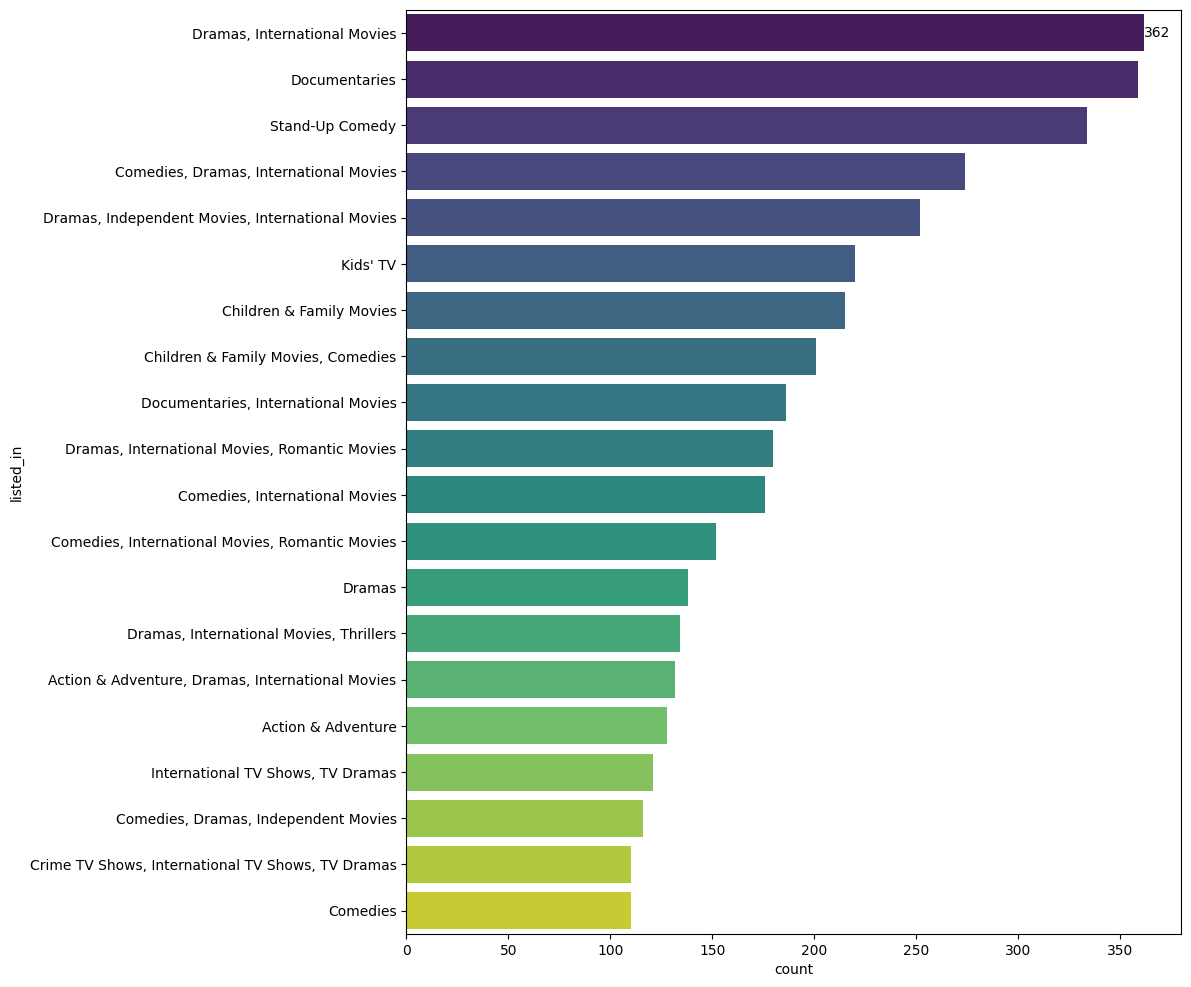

In [74]:
len(netflix_data['listed_in'].unique())
print('************************************************\n',netflix_data['listed_in'].value_counts(),
    '\n************************************************')

plt.figure(figsize = (10,12))
ax = sns.countplot(data = netflix_data, y= 'listed_in',order = netflix_data['listed_in'].value_counts().index[0:20]
                   , palette = 'viridis')
ax.bar_label(ax.containers[0])
plt.show()

In [82]:
int_col = netflix_data.select_dtypes(include = ("int")).columns
str_col = netflix_data.select_dtypes(include = ("object")).columns
flt_col = netflix_data.select_dtypes(include = ("float")).columns

Index(['release_year'], dtype='object')
['release_year']


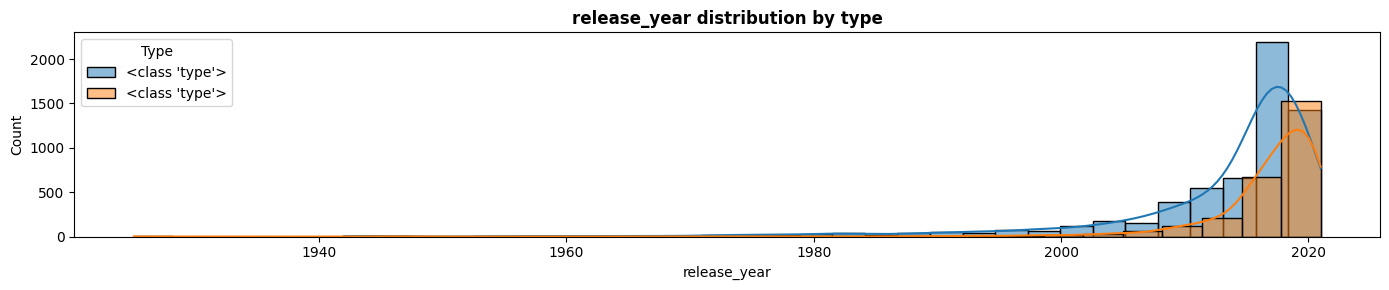

In [91]:
print(int_col)
int_col_without_id = [col for col in int_col if col != 'id']
print(int_col_without_id)
unique_outcomes = netflix_data['type'].unique()
plt.figure(figsize=(14, len(int_col_without_id) * 3))

for i,col in enumerate(int_col_without_id) :
    plt.subplot(len(int_col_without_id),1,i+1) #(rows,columns,position)

    for outcome in unique_outcomes :
        sns.histplot(data = netflix_data[netflix_data['type'] == outcome], x = col,bins = 30, kde = True,label=type)

    plt.title(f"{col} distribution by type", fontweight = "bold")
    plt.xlabel(col)
    plt.legend(title = 'Type')
    
plt.tight_layout()
plt.show()


In [92]:
fig = px.histogram(netflix_data, x = 'rating', title = 'Rating', color = 'rating')
fig.update_layout(bargap=0.2)
fig.show()

In [93]:
len(netflix_data.duration.unique())

221

In [94]:
le = LabelEncoder()
for col in str_col :
    netflix_data[col] = le.fit_transform(netflix_data[col].astype(str))

In [95]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,1975,2295,7246,603,1711,2020,7,210,274,2577
1,1111,1,1091,4303,409,426,1706,2021,11,110,414,1762
2,2222,1,2651,2105,6296,736,1706,2021,11,0,242,7341
3,3333,1,3506,4303,7246,736,1706,2021,11,0,297,3617
4,4444,1,3861,4303,4815,251,1706,2021,11,110,393,4416
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,0,8770,979,4677,603,1419,2007,8,70,269,895
8803,8672,1,8773,4303,7246,736,788,2018,14,110,424,8483
8804,8673,0,8774,3631,3231,603,1366,2009,8,206,207,5228
8805,8674,0,8777,3247,7061,603,665,2006,6,206,125,3315


In [97]:
# Training and Testing

x = netflix_data.drop(['type'], axis = 'columns') # inplace nahi hua hai
y = netflix_data[['type']]

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [99]:
rf = RandomForestClassifier(n_estimators=100,random_state=0) # random state 0 : every time same output,reproducible
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
accuracy = accuracy_score(y_test,predictions)
print(f"Accuracy of the RandomForestClassifier on the test set: {accuracy}")

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy of the RandomForestClassifier on the test set: 0.9954597048808173
